# Red Profunda Perceptrón Multicapa
## Imports Necesarios

In [171]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model



## Cargar archivo de Entradas

In [172]:
np.random.seed(1)

In [173]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape

In [174]:
# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [175]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]


dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_train
#len(x_train)

In [176]:
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [177]:
y_train

array([0.502, 0.251, 0.927, ..., 0.145, 0.045, 0.115])

## Crear Modelo, Entrenarlo y Predecir

In [178]:
## Funcion para obtener score R2
#from keras import backend as K
#def r2_keras(y_true, y_pred):
#    SS_res =  K.sum(K.square(y_true - y_pred)) 
#    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [241]:
## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mch = ModelCheckpoint('best_model_deep.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)


model = Sequential()
model.add(Dense(45, input_dim=45, activation='relu'))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))

model.add(Dense(1, activation='linear'))
 
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])
 
hist=model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[es,mch])
#validation_data=(x_test, y_test),



Train on 76876 samples, validate on 19220 samples
Epoch 1/1000
76876/76876 [==============================] - 59s 768us/step - loss: 0.0595 - mean_squared_error: 0.0095 - val_loss: 0.0513 - val_mean_squared_error: 0.0070

Epoch 00001: val_mean_squared_error improved from inf to 0.00695, saving model to best_model_deep.h5
Epoch 2/1000
76876/76876 [==============================] - 52s 681us/step - loss: 0.0440 - mean_squared_error: 0.0058 - val_loss: 0.0363 - val_mean_squared_error: 0.0047

Epoch 00002: val_mean_squared_error improved from 0.00695 to 0.00473, saving model to best_model_deep.h5
Epoch 3/1000
76876/76876 [==============================] - 67s 866us/step - loss: 0.0462 - mean_squared_error: 0.0066 - val_loss: 0.0410 - val_mean_squared_error: 0.0052

Epoch 00003: val_mean_squared_error did not improve from 0.00473
Epoch 4/1000
76876/76876 [==============================] - 73s 954us/step - loss: 0.0383 - mean_squared_error: 0.0053 - val_loss: 0.0398 - val_mean_squared_error:

76876/76876 [==============================] - 61s 792us/step - loss: 0.0262 - mean_squared_error: 0.0040 - val_loss: 0.0269 - val_mean_squared_error: 0.0039

Epoch 00033: val_mean_squared_error did not improve from 0.00381
Epoch 34/1000
76876/76876 [==============================] - 62s 804us/step - loss: 0.0258 - mean_squared_error: 0.0039 - val_loss: 0.0305 - val_mean_squared_error: 0.0041

Epoch 00034: val_mean_squared_error did not improve from 0.00381
Epoch 35/1000
76876/76876 [==============================] - 52s 682us/step - loss: 0.0257 - mean_squared_error: 0.0040 - val_loss: 0.0245 - val_mean_squared_error: 0.0039

Epoch 00035: val_mean_squared_error did not improve from 0.00381
Epoch 36/1000
76876/76876 [==============================] - 59s 771us/step - loss: 0.0255 - mean_squared_error: 0.0039 - val_loss: 0.0245 - val_mean_squared_error: 0.0039

Epoch 00036: val_mean_squared_error did not improve from 0.00381
Epoch 37/1000
76876/76876 [==============================] - 5

76876/76876 [==============================] - 57s 740us/step - loss: 0.0235 - mean_squared_error: 0.0036 - val_loss: 0.0228 - val_mean_squared_error: 0.0036

Epoch 00066: val_mean_squared_error did not improve from 0.00357
Epoch 67/1000
76876/76876 [==============================] - 53s 686us/step - loss: 0.0236 - mean_squared_error: 0.0036 - val_loss: 0.0231 - val_mean_squared_error: 0.0037

Epoch 00067: val_mean_squared_error did not improve from 0.00357
Epoch 68/1000
76876/76876 [==============================] - 49s 641us/step - loss: 0.0235 - mean_squared_error: 0.0036 - val_loss: 0.0284 - val_mean_squared_error: 0.0039

Epoch 00068: val_mean_squared_error did not improve from 0.00357
Epoch 69/1000
76876/76876 [==============================] - 57s 739us/step - loss: 0.0231 - mean_squared_error: 0.0036 - val_loss: 0.0223 - val_mean_squared_error: 0.0036

Epoch 00069: val_mean_squared_error did not improve from 0.00357
Epoch 70/1000
76876/76876 [==============================] - 6

76876/76876 [==============================] - 43s 560us/step - loss: 0.0223 - mean_squared_error: 0.0033 - val_loss: 0.0236 - val_mean_squared_error: 0.0036

Epoch 00099: val_mean_squared_error did not improve from 0.00332
Epoch 100/1000
76876/76876 [==============================] - 43s 558us/step - loss: 0.0224 - mean_squared_error: 0.0033 - val_loss: 0.0263 - val_mean_squared_error: 0.0036

Epoch 00100: val_mean_squared_error did not improve from 0.00332
Epoch 101/1000
76876/76876 [==============================] - 43s 555us/step - loss: 0.0224 - mean_squared_error: 0.0033 - val_loss: 0.0222 - val_mean_squared_error: 0.0034

Epoch 00101: val_mean_squared_error did not improve from 0.00332
Epoch 102/1000
76876/76876 [==============================] - 43s 555us/step - loss: 0.0223 - mean_squared_error: 0.0033 - val_loss: 0.0228 - val_mean_squared_error: 0.0035

Epoch 00102: val_mean_squared_error did not improve from 0.00332
Epoch 103/1000
76876/76876 [==============================]

76876/76876 [==============================] - 46s 593us/step - loss: 0.0220 - mean_squared_error: 0.0032 - val_loss: 0.0237 - val_mean_squared_error: 0.0034

Epoch 00133: val_mean_squared_error did not improve from 0.00326
Epoch 134/1000
76876/76876 [==============================] - 43s 565us/step - loss: 0.0215 - mean_squared_error: 0.0030 - val_loss: 0.0220 - val_mean_squared_error: 0.0033

Epoch 00134: val_mean_squared_error did not improve from 0.00326
Epoch 135/1000
76876/76876 [==============================] - 43s 557us/step - loss: 0.0215 - mean_squared_error: 0.0030 - val_loss: 0.0219 - val_mean_squared_error: 0.0033

Epoch 00135: val_mean_squared_error did not improve from 0.00326
Epoch 136/1000
76876/76876 [==============================] - 43s 555us/step - loss: 0.0213 - mean_squared_error: 0.0031 - val_loss: 0.0212 - val_mean_squared_error: 0.0034

Epoch 00136: val_mean_squared_error did not improve from 0.00326
Epoch 137/1000
76876/76876 [==============================]

### Obtener Mejor Modelo

In [235]:
# load the saved model
best_model = load_model('best_model_deep.h5')


In [236]:
#best_model.summary()

### Generar Predicción

In [237]:
#y_pred_train = model.predict(x_train)
#y_pred_test = model.predict(x_test)

y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

## Obtener Metricas del Modelo

In [238]:

# evaluate the model
scores_best = best_model.evaluate(x_train, y_train)
#_, test_acc = best_model.evaluate(testX, testy, verbose=0)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)

scores_best[0]


76876/76876 [==============================] - 33s 426us/step


0.018614607880912428

In [239]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (best_model.metrics_names[0], scores_best[0]*100))
print("\n%s: %.2f%%" % (best_model.metrics_names[1], scores_best[1]*100))

#print (model.predict(x_train).round())


loss: 1.86%

mean_squared_error: 0.24%


In [240]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))



Coefficient of determination Train (R^2): 0.96
Coefficient of determination Test (R^2): 0.94


## Graficar Resultados

In [159]:
neuronas =45
capas=1
#pred_train = best_model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])


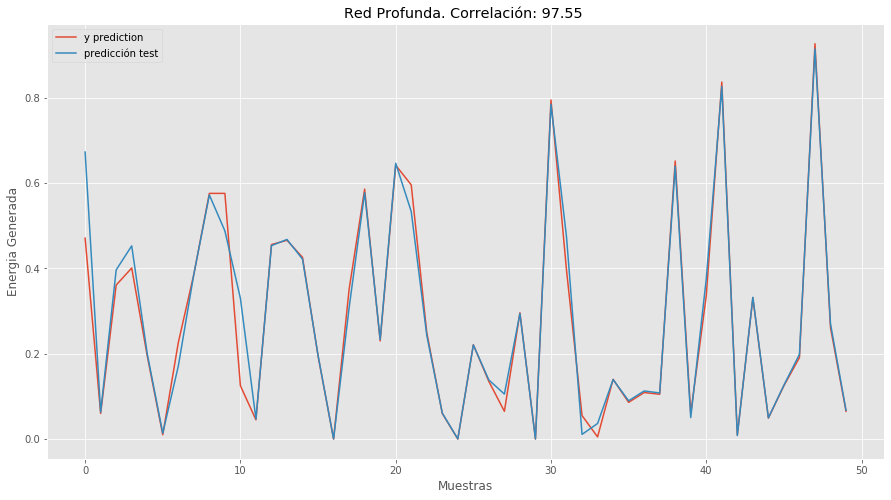

In [160]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

plt.plot(y_test_plot, label ="y prediction")
plt.plot(pred_test_plot, label ="predicción test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Red Profunda. Correlación: %.2f " % ( corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()

In [161]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


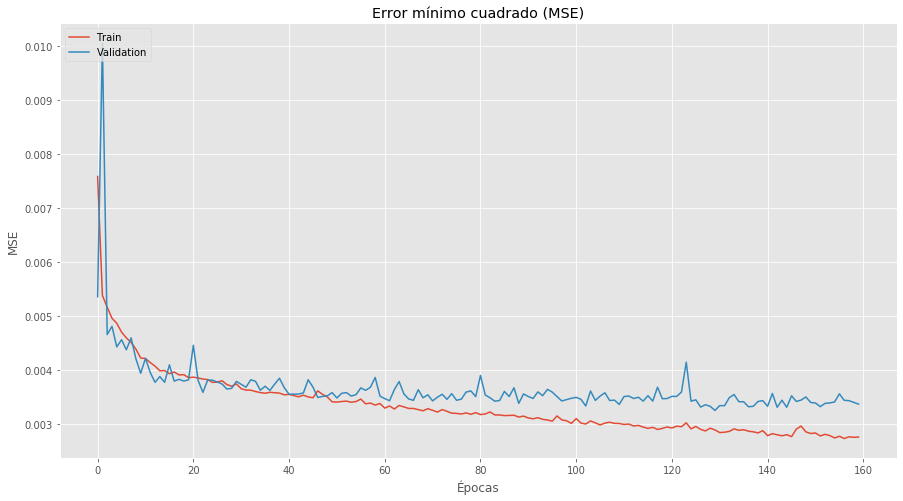

In [162]:
# Plot training & validation accuracy values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Error mínimo cuadrado (MSE)')
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

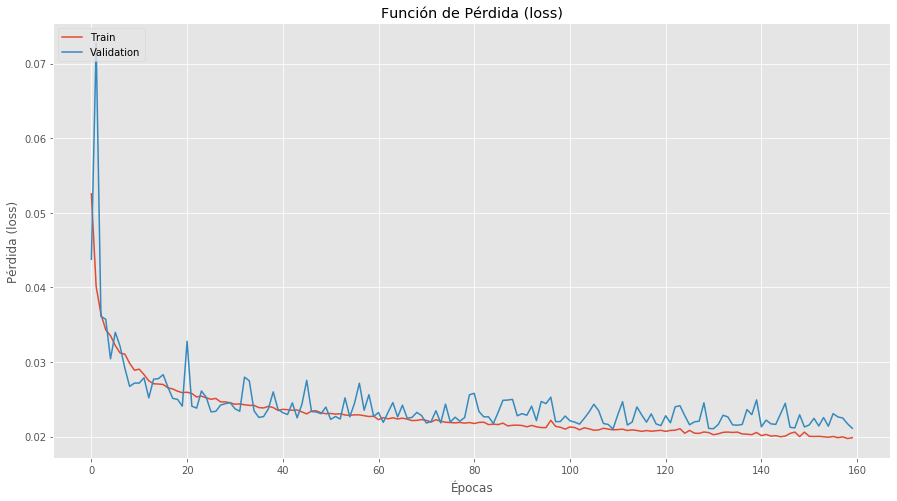

In [163]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Función de Pérdida (loss)')
plt.ylabel('Pérdida (loss)')
plt.xlabel('Épocas')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])


#test= np.array([[3.66,106.24,2009,7]])
#y_12 = model.predict(test)
#print(y_12)

In [17]:

#df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
#df_test.head()

In [18]:
#df_test.describe()

In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [19]:
#df = df_test.values
#x_test = df[:,0:4]

#x_test

#y_12 = model.predict(x_test)

#print(y_12)

### Guarda Datos de Predicción

In [ ]:
## Gurdar regresión

In [20]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_deepNN.csv')
